### Importing All Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

In [2]:
data = pd.read_table('SMSSpamCollection+(1)',header = None, names= ['Category', 'Title'])

In [3]:
data.head()

,Category,Title
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['Labeling']= data['Category'].map({'ham': 1, 'spam':0})

### Data Cleaning

In [5]:
data.isnull().sum()

Category    0
Title       0
Labeling    0
dtype: int64

In [6]:
data.head()

,Category,Title,Labeling
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [7]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
data.shape

(5572, 3)

### Splitting the data into training and testing data

In [9]:
X = data['Title']
Y = data['Labeling']
from sklearn.model_selection import train_test_split as tt
X_train, X_test, Y_train, Y_test = tt(X, Y,test_size=0.2, random_state=100)

In [10]:
X_train.shape

(4457,)

In [11]:
X_test.shape

(1115,)

### All words excluding the stop_words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words ='english')
vector.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
vector.vocabulary_

{'da': 2110,
 'page': 4901,
 'want': 7160,
 'beautiful': 1262,
 'girl': 3072,
 'ive': 3667,
 'seen': 5827,
 'baby': 1175,
 'come': 1880,
 'common': 1890,
 'room': 5657,
 'just': 3767,
 'sleeping': 6046,
 'surfing': 6439,
 'maybe': 4290,
 'westshore': 7253,
 'hyde': 3469,
 'park': 4940,
 'village': 7076,
 'place': 5082,
 'near': 4598,
 'house': 3421,
 'hi': 3340,
 'darlin': 2128,
 'work': 7350,
 'did': 2261,
 'trouble': 6834,
 'ijust': 3504,
 'talked': 6505,
 'mum': 4521,
 'morning': 4471,
 'really': 5446,
 'good': 3113,
 'time': 6692,
 'night': 4655,
 'im': 3514,
 'goin': 3099,
 'soon': 6139,
 'sad': 5711,
 'puppy': 5340,
 'noise': 4677,
 'hows': 3427,
 'champ': 1694,
 'leaving': 3957,
 'glasgow': 3082,
 'sorry': 6148,
 'll': 4050,
 'later': 3923,
 'ree': 5489,
 'entry': 2568,
 'weekly': 7226,
 'comp': 1892,
 'chance': 1697,
 'win': 7288,
 'ipod': 3634,
 'txt': 6882,
 'pod': 5130,
 '80182': 661,
 'std': 6278,
 'rate': 5413,
 'apply': 1014,
 '08452810073': 68,
 'details': 2238,
 '18': 3

In [14]:
vector.get_feature_names()

['00',
 '000',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '0721072',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700621170150p',
 '08701213186',
 '08701237397',

In [15]:
X_train_transformed =vector.transform(X_train)
X_test_transformed =vector.transform(X_test)

### Building the model with Multinomial Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_transformed,Y_train)
y_pred = model.predict(X_test_transformed)
y_pred_prob = model.predict_proba(X_test_transformed)

### Prediction

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(Y_test,y_pred))
print()
print(accuracy_score(Y_test,y_pred))

[[137  10]
 [  5 963]]

0.9865470852017937


In [18]:
print(precision_score(Y_test,y_pred))
print()
print(recall_score(Y_test,y_pred))
print()
print(f1_score(Y_test,y_pred))
print()

0.9897225077081192

0.9948347107438017

0.9922720247295209



In [19]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9859377635351662


In [20]:
print(false_positive_rate)
print()
print(true_positive_rate)
print()
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00680272
 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272
 0.00680272 0.00680272 0.00680272 0.01360544 0.01360544 0.02040816
 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
 0.02040816 0.02040816 0.02040816 0.02721088 0.02721088 0.02721088
 0.02721088 0.02721088 0.02721088 0.02721088 0.02721088 0.02721088
 0.03401361 0.03401361 0.03401361 0.03401361 0.03401361 0.03401361
 0.03401361 0.03401361 0.03401361 0.03401361 0.03401361 0.03401361
 0.03401361 0.03401361 0.03401361 0.03401361 0.03401361 0.04081633
 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633 0.04081633
 0.04081633 0.04081633 0.04081633 0.04761905 0.04761905 0.04761905
 0.04761905 0.05442177 0.05442177 0.05442177 0.05442177 0.05442177
 0.05442177 0.05442177 0.05442177 0.06122449 0.06122449 0.06802721
 0.06802721

In [22]:
# matrix of thresholds, tpr, fpr
df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

In [24]:
df.head()

,Threshold,TPR,FPR
0,2.0,0.000000,0.0
1,1.0,0.019628,0.0
2,1.0,0.021694,0.0
3,1.0,0.024793,0.0
4,1.0,0.028926,0.0


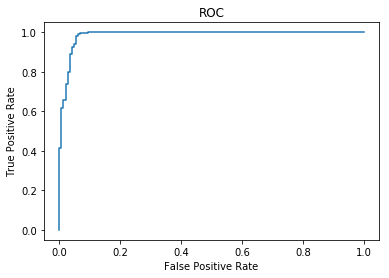

In [25]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

### Building the model Bernoulli Naive Bayes

In [26]:
from sklearn.naive_bayes import BernoulliNB
modelB = BernoulliNB()
modelB.fit(X_train_transformed,Y_train)
y_pred = modelB.predict(X_test_transformed)
y_pred_prob = modelB.predict_proba(X_test_transformed)

### Prediction

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(Y_test,y_pred))
print()
print(accuracy_score(Y_test,y_pred))

[[117  30]
 [  1 967]]

0.9721973094170404


In [28]:
print(precision_score(Y_test,y_pred))
print()
print(recall_score(Y_test,y_pred))
print()
print(f1_score(Y_test,y_pred))
print()

0.9699097291875627

0.9989669421487604

0.9842239185750636



In [29]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9949471524146849


In [30]:
print(false_positive_rate)
print()
print(true_positive_rate)
print()
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00680272 0.00680272 0.00680272
 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272
 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272
 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272
 0.00680272 0.00680272 0.00680272 0.00680272 0.00680272 0.01360544
 0.01360544 0.01360544 0.01360544 0.01360544 0.01360544 0.02040816
 0.02040

In [31]:
df = pd.DataFrame({'FalsePositive': false_positive_rate,'TruePositive': true_positive_rate,'Thresholds':thresholds})
df.head()

,FalsePositive,TruePositive,Thresholds
0,0.0,0.000000,2.0
1,0.0,0.008264,1.0
2,0.0,0.009298,1.0
3,0.0,0.012397,1.0
4,0.0,0.016529,1.0


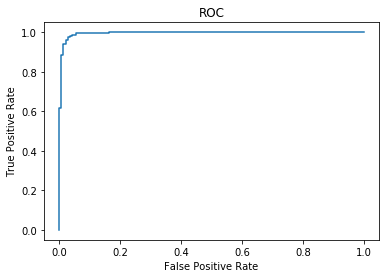

In [32]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)